<a href="https://colab.research.google.com/github/cyberone1812/CMUDeepLearning/blob/main/clean_dele_w6_pytorch_convnet_cifar_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Training a Convolutional Net in `PyTorch`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10, ImageFolder
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Use built in transformers to prepare images.

In [ ]:
ls drive/MyDrive/small/train/

cats_train/  dogs_train/


In [ ]:
#compose
folder_transformer = transforms.Compose([transforms.Resize((128, 128)),
                                         transforms.ToTensor()])

In [ ]:
#data
imfolder = ImageFolder('drive/MyDrive/small/train/', transform=folder_transformer)
imloader = DataLoader(imfolder, batch_size = 24)

In [ ]:
#shape
imfolder[0][0].shape

torch.Size([3, 128, 128])

In [ ]:
#make transforms
transformer = transforms.Compose([transforms.ToTensor(),
                                  transforms.Normalize(
                                      mean = (0.5, 0.5, 0.5),
                                      std = (0.5, 0.5, 0.5)
                                  )])

In [ ]:
#dataset
trainset = CIFAR10(root = '.', download = True, transform=transformer)

100%|██████████| 170498071/170498071 [00:13<00:00, 12609554.85it/s]


Extracting ./cifar-10-python.tar.gz to .


In [ ]:
#create batches
trainloader = DataLoader(trainset, batch_size = 24)

In [ ]:
testset = CIFAR10(root = '.', download = True, train = False, transform=transformer)

Files already downloaded and verified


In [ ]:
testloader = DataLoader(testset, batch_size = 24)

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
# get a random training image
im, label = trainloader.dataset[0]

In [ ]:
im.shape

torch.Size([3, 32, 32])

In [ ]:
#size of one image
im[0].shape

torch.Size([32, 32])

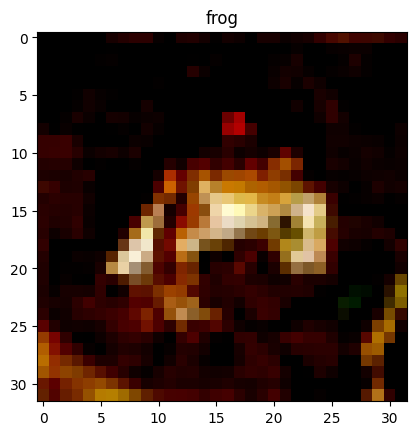

In [ ]:
#size of batch
plt.imshow(np.transpose(im, (1, 2, 0)))
plt.title(classes[int(label)]);

### Define Convolutional Neural Network

In [ ]:
nn.Conv2d?

$$\text{INPUT} = (C_{in}, H_{in}, W_{in})$$

$$\text{OUTPUT} = (C_{out}, H_{out}, W_{out})$$

$$H_{out} = \left\lfloor\frac{H_{in}  + 2 \times \text{padding}[0] - \text{dilation}[0]
                    \times (\text{kernel\_size}[0] - 1) - 1}{\text{stride}[0]} + 1\right\rfloor$$

$$W_{out} = \left\lfloor\frac{W_{in}  + 2 \times \text{padding}[1] - \text{dilation}[1]
                    \times (\text{kernel\_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor$$

In [ ]:
#example conv2d
conv1 = nn.Conv2d(in_channels = 3,
                  out_channels = 10,
                  kernel_size=3,
                  stride = 1)


In [ ]:
#data through
out1 = conv1(im)

In [ ]:
#shape?
print(out1.shape)
(32 + 2*0 - 1*(3 - 1) - 1)/1 + 1

torch.Size([10, 30, 30])


30.0

In [ ]:
#pool and examine
pool1 = nn.MaxPool2d(kernel_size=2)
out2 = pool1(out1)
out2.shape

torch.Size([10, 15, 15])

In [ ]:
#convolve again
conv2 = nn.Conv2d(in_channels = 10, out_channels = 20, kernel_size = 3)
out3 = conv2(out2)
out3.shape

torch.Size([20, 13, 13])

In [ ]:
# pool again
out4 = pool1(out3)
out4.shape

torch.Size([20, 6, 6])

In [ ]:
out4.unsqueeze(0).shape

torch.Size([1, 20, 6, 6])

In [ ]:
#flatten
flattener = nn.Flatten(start_dim = 0)
flattened = flattener(out4)

In [ ]:
flattened.shape

torch.Size([720])

In [ ]:
20*6*6

720

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class CNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 3,
                           out_channels = 16,
                           kernel_size = 3,
                           padding = 1,
                           stride = 1)
    self.pool = nn.MaxPool2d(kernel_size = 2)
    self.conv2 = nn.Conv2d(in_channels = 16,
                           out_channels = 8,
                           kernel_size=3,
                           stride = 1,
                           padding = 1)
    self.flatten = nn.Flatten()

    self.linear1 = nn.Linear(in_features=8*8*8, out_features = 128)
    #first convolve and pool (3, 32, 32) ---> (16, 16, 16)
    #second convolve and pool (16, 16, 16) ---> (8, 8, 8)
    self.linear2 = nn.Linear(in_features=128, out_features=64)
    #output layer
    self.linear3 = nn.Linear(in_features = 64, out_features = 10)
    self.activation_1 = nn.ReLU()

  def forward(self, x):
    x = self.pool(self.activation_1(self.conv1(x)))
    x = self.pool(self.activation_1(self.conv2(x)))
    x = self.flatten(x)
    x = self.activation_1(self.linear1(x))
    x = self.activation_1(self.linear2(x))
    x = self.linear3(x)
    return x



c1 = nn.Conv2d(in_channels = 3,
                           out_channels = 16,
                           kernel_size = 3,
                           padding = 1,
                           stride = 1)
pool = nn.MaxPool2d(kernel_size = 2)
c2 = nn.Conv2d(in_channels = 16,
                           out_channels = 8,
                           kernel_size=3,
                           stride = 1,
                           padding = 1)
lin1 = nn.Linear(in_features=8*8*8, out_features = 128)
lin2 = nn.Linear(in_features=128, out_features = 64)
lin3 = nn.Linear(in_features=64, out_features = 10)
activate = nn.ReLU()

cnet_sequential = nn.Sequential(c1, activate, pool,
                                c2, activate, pool,
                                nn.Flatten(),
                                lin1, activate,
                                lin2, activate,
                                lin3)








In [ ]:
import torch.optim as optim

In [ ]:
# instantiate
model = CNet()

In [ ]:
#criteria and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model = model.to(device)

In [ ]:
#train briefly
for epoch in range(20):
  loss = 0
  for x,y in trainloader:
    x = x.to(device)
    y = y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss += loss.item()
  print(f'Epoch {epoch} and Loss {loss}')

Epoch 0 and Loss 4.825628757476807
Epoch 1 and Loss 4.40080451965332
Epoch 2 and Loss 4.0285234451293945
Epoch 3 and Loss 3.83526611328125
Epoch 4 and Loss 3.4970896244049072
Epoch 5 and Loss 3.344174385070801
Epoch 6 and Loss 3.181431293487549
Epoch 7 and Loss 3.0139975547790527
Epoch 8 and Loss 3.162473678588867
Epoch 9 and Loss 3.0240254402160645
Epoch 10 and Loss 2.9865500926971436
Epoch 11 and Loss 2.8833682537078857
Epoch 12 and Loss 2.802896022796631
Epoch 13 and Loss 2.5186471939086914
Epoch 14 and Loss 2.30574369430542
Epoch 15 and Loss 2.003472328186035


KeyboardInterrupt: 

In [ ]:
#20 epochs


### Evaluating the Model

In [ ]:
correct = 0
total = 0
#accuracy of test data
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    yhat = model(images)
    _, predicted = torch.max(yhat.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

In [ ]:
correct/total

### Using Pretrained Models

In [ ]:
import torchvision
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler

In [ ]:
from torchvision.io import read_image

In [ ]:
ls drive/MyDrive/small/train/dogs_train/dog.11653.jpg

drive/MyDrive/small/train/dogs_train/dog.11653.jpg


In [ ]:
img = read_image('drive/MyDrive/small/train/dogs_train/dog.11653.jpg')

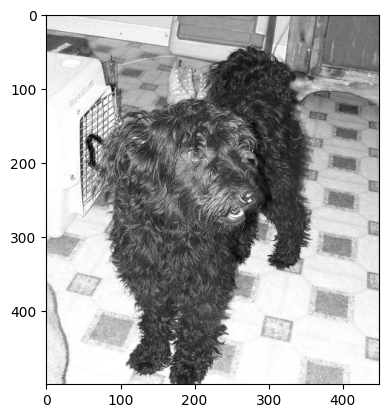

In [ ]:
plt.imshow(img[0, :, :], cmap = 'gray')

In [ ]:
# Step 1: Initialize model with the best available weights
weights = models.ResNet50_Weights.DEFAULT
model = models.resnet50(weights=weights)
model.eval()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 169MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

In [ ]:
# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

giant schnauzer: 17.8%
